# Atividade Contextualizada 10
### Autor: Gilberto Martins 
#### E-mail: gilberto.filho@edu.isd.org.br

Este código irá utilizar a biblioteca Pymatgen, uma bilbioteca voltada para análise dos materiais em sua totalidade (Estruturas, . Realizando a importação de arquivos e contendo bibliotecas como numpy, matplotlib, pandas, SciPy e entre outras.

### Importando o pymatgen 

In [1]:
import pymatgen

In [2]:
print(pymatgen.__version__)
print(pymatgen.__file__)

2020.9.14
c:\users\gilbe\appdata\local\programs\python\python37\lib\site-packages\pymatgen\__init__.py


In [3]:
import sys
print (sys.version)

3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]


### Trabalhando com moléculas

In [7]:
from pymatgen import Molecule

In [8]:
water = Molecule.from_file("water.xyz")
print(water)

Full Formula (H2 O1)
Reduced Formula: H2O
Charge = 0, Spin Mult = 1
Sites (3)
0 O    -0.070000    -0.026960    -0.095240
1 H     0.919330    -0.015310    -0.054070
2 H    -0.359290     0.231000     0.816010


In [9]:
print(water[0])

[-0.07    -0.02696 -0.09524] O


In [10]:
print(water[1])

[ 0.91933 -0.01531 -0.05407] H


In [11]:
print(water[2])

[-0.35929  0.231    0.81601] H


In [12]:
example = Molecule(["H","H"], [[0.0, 0.0, 0.0], [0.1,0.0,0.0]], validate_proximity=False)
example

Molecule Summary
Site: H (0.0000, 0.0000, 0.0000)
Site: H (0.1000, 0.0000, 0.0000)

In [13]:
water.cart_coords

array([[-0.07   , -0.02696, -0.09524],
       [ 0.91933, -0.01531, -0.05407],
       [-0.35929,  0.231  ,  0.81601]])

### Importando Elementos, Composição, Estrutura e Sistema Cristalino

In [20]:
from pymatgen import Element, Specie, Composition
from pymatgen import Structure
from pymatgen import Lattice

In [21]:
nacl = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"], [[0,0,0],[0.5,0.5,0.5]])

In [22]:
print(nacl)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.692000   5.692000   5.692000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na+   0    0    0
  1  Na+   0    0.5  0.5
  2  Na+   0.5  0    0.5
  3  Na+   0.5  0.5  0
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0.5  0    0
  6  Cl-   0    0.5  0
  7  Cl-   0    0    0.5


### Importando Estruturas de arquivos .CIF

In [23]:
Cu = Structure.from_file("Cu.cif")

In [24]:
from pymatgen.core.surface import SlabGenerator

In [25]:
slabgen = SlabGenerator(Cu, (1, 1, 1), 10, 10)

In [26]:
slabs = slabgen.get_slabs()

In [27]:
print(len(slabs))

1


In [28]:
Cu_111 = slabs[0]

### Verificando o Plano Gerado e a Estrutra

In [29]:
Cu_111

Structure Summary
Lattice
    abc : 2.56061891665316 2.5606189166531603 20.959569147135973
 angles : 86.4979230109456 86.4979230109456 60.00000000000001
 volume : 118.71889639130947
      A : 2.5558371778088786 0.0 0.15641469512787995
      B : 1.2731323769609773 2.216176353588258 0.15641469512787998
      C : 0.0 0.0 20.959569147135973
PeriodicSite: Cu (2.4888, 1.4405, 1.2513) [0.6500, 0.6500, 0.0500]
PeriodicSite: Cu (3.6375, 2.1054, 3.4411) [0.9500, 0.9500, 0.1500]
PeriodicSite: Cu (0.9572, 0.5540, 5.3181) [0.2500, 0.2500, 0.2500]
PeriodicSite: Cu (2.1059, 1.2189, 7.5079) [0.5500, 0.5500, 0.3500]
PeriodicSite: Cu (3.2546, 1.8837, 9.6977) [0.8500, 0.8500, 0.4500]

In [30]:
print(Cu_111.miller_index, Cu_111.shift)

(1, 1, 1) 0.5


### Gerando Imagem da Estrutura e do Plano

In [31]:
from pymatgen.analysis.adsorption import plot_slab
from matplotlib import pyplot as plt 
%matplotlib inline

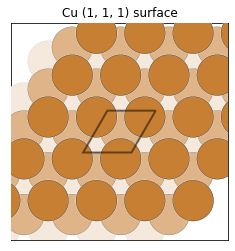

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=False)
ax.set_title("Cu (1, 1, 1) surface")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Verificando os locais de adsorção no plano e entre as camadas

In [33]:
from pymatgen.analysis.adsorption import AdsorbateSiteFinder

In [34]:
asf = AdsorbateSiteFinder(Cu_111)

In [35]:
add_sites = asf.find_adsorption_sites()
add_sites

{'ontop': [array([ 3.13253096,  1.81308338, 11.69272977])],
 'bridge': [array([ 1.85461237,  1.81308338, 11.61452242])],
 'hollow': [array([ 0.57988459,  0.33563247, 11.48417684]),
  array([ 1.85620778,  1.07435792, 11.58845331])],
 'all': [array([ 3.13253096,  1.81308338, 11.69272977]),
  array([ 1.85461237,  1.81308338, 11.61452242]),
  array([ 0.57988459,  0.33563247, 11.48417684]),
  array([ 1.85620778,  1.07435792, 11.58845331])]}

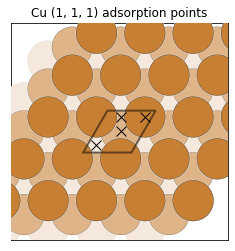

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=True)
ax.set_title("Cu (1, 1, 1) adsorption points")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Importar moléculas para colocar nos sítios de adsorção

In [38]:
from pymatgen import Molecule

In [39]:
adsorbate = Molecule("H", [[0,0,0]])

In [40]:
ads_sructs = asf.generate_adsorption_structures(adsorbate, repeat=[1, 1, 1], 
find_args={"distance":1.6})

c:\users\gilbe\appdata\local\programs\python\python37\lib\site-packages\pymatgen\core\structure.py:731: UserWarning: Not all sites have property bulk_wyckoff. Missing values are set to None.
  "are set to None." % k)
c:\users\gilbe\appdata\local\programs\python\python37\lib\site-packages\pymatgen\core\structure.py:731: UserWarning: Not all sites have property bulk_equivalent. Missing values are set to None.
  "are set to None." % k)


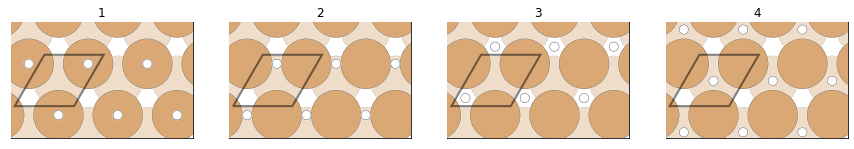

In [41]:
fig = plt.figure(figsize=[15,60])
for n, ads_struct in enumerate(ads_sructs):
    ax = fig.add_subplot(1, 4, n+1)
    plot_slab(ads_struct, ax, adsorption_sites=False)
    ax.set_title(n+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0.5)
    ax.set_ylim(-1,4)
plt.show()

In [42]:
adsorbate_1 = Molecule("C", [[0,0,0]])

In [43]:
ads_sructs = asf.generate_adsorption_structures(adsorbate_1, repeat=[1, 1, 1], 
find_args={"distance":1.6})

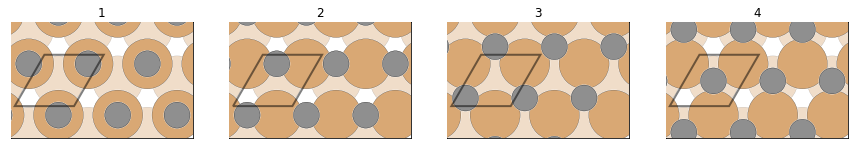

In [44]:
fig = plt.figure(figsize=[15,60])
for n, ads_struct in enumerate(ads_sructs):
    ax = fig.add_subplot(1, 4, n+1)
    plot_slab(ads_struct, ax, adsorption_sites=False)
    ax.set_title(n+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0.5)
    ax.set_ylim(-1,4)
plt.show()

### Verificar a possibilidade de adsorção do CO2

In [45]:
CO2_x = Molecule(["O","C","O"],[[-1.16, 0, 0], [0, 0, 0], [1.16, 0, 0]])
CO2_y = Molecule(["O","C","O"],[[0, -1.16, 0], [0, 0, 0], [0, 1.16, 0]])
CO2_z = Molecule(["O","C","O"],[[0, 0, -1.16], [0, 0, 0], [0, 0, 1.16]])

In [46]:
ads_sites = asf.find_adsorption_sites()
ads_coords = ads_sites['ontop'][0]

In [47]:
x_struct = asf.add_adsorbate(CO2_x, ads_coords, repeat=[2, 2, 1])
y_struct = asf.add_adsorbate(CO2_y, ads_coords, repeat=[2, 2, 1])
z_struct = asf.add_adsorbate(CO2_z, ads_coords, repeat=[2, 2, 1])

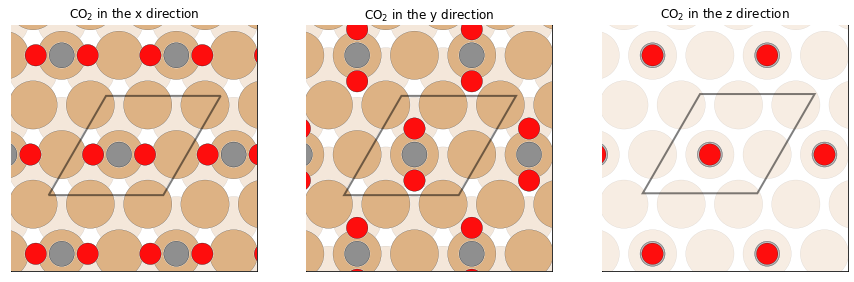

In [48]:
 for struc, ax, title in zip([x_struct, y_struct, z_struct], plt.subplots(1, 3, figsize=[15, 45])[1], ["x", "y", "z"]):
     plot_slab(struc, ax, adsorption_sites=False)
     ax.set_title(r"CO$_2$ in the %s direction" % title)
     ax.set_xlim(-1, 10)
     ax.set_ylim(-3, 8)
     ax.set_xticks([])
     ax.set_yticks([])
 plt.show()

In [50]:
ads_sites = asf.find_adsorption_sites()
ads_coords_1 = ads_sites['hollow'][0]

In [52]:
x_struct = asf.add_adsorbate(CO2_x, ads_coords_1, repeat=[2, 2, 1])
y_struct = asf.add_adsorbate(CO2_y, ads_coords_1, repeat=[2, 2, 1])
z_struct = asf.add_adsorbate(CO2_z, ads_coords_1, repeat=[2, 2, 1])

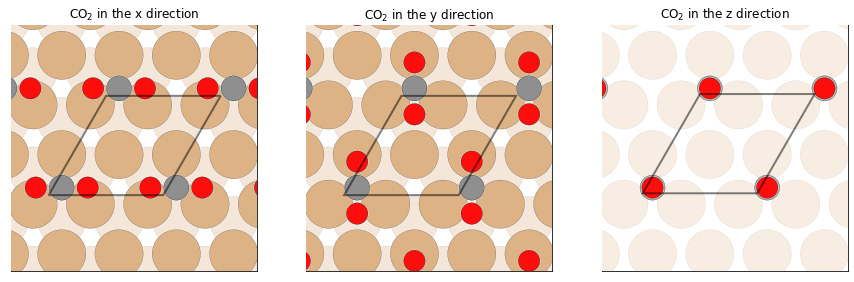

In [53]:
 for struc, ax, title in zip([x_struct, y_struct, z_struct], plt.subplots(1, 3, figsize=[15, 45])[1], ["x", "y", "z"]):
     plot_slab(struc, ax, adsorption_sites=False)
     ax.set_title(r"CO$_2$ in the %s direction" % title)
     ax.set_xlim(-1, 10)
     ax.set_ylim(-3, 8)
     ax.set_xticks([])
     ax.set_yticks([])
 plt.show()

### Salvando arquivos em formato .CIF 

In [54]:
x_struct.to(fmt="cif", filename="Cu_CO2_x.cif")
y_struct.to(fmt="cif", filename="Cu_CO2_y.cif")
z_struct.to(fmt="cif", filename="Cu_CO2_z.cif")